In [162]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import InceptionV3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [164]:
fingertype = {
    'real': '01',
    'altered': '02',
}

In [166]:
dataset="C://Users//tatba//OneDrive//Desktop//Dataset//Fingerprintscan"

In [168]:
# Image parameters
img_height, img_width = 128, 128

In [170]:
# Load images and labels from filenames
def load_data(path):
    images = []
    labels = []
    for filename in os.listdir(path):
        if filename.endswith('.BMP'):
            # Load image manually using cv2
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, (img_width, img_height))
            img_array = img / 255.0  # Normalize
            images.append(img_array)
            # Extract emotion from filename (3rd element in the filename)
            finger_code = filename.split('-')[0]
            finger_label = fingertype[finger_code]
            labels.append(finger_code)
    return np.array(images), np.array(labels)

In [172]:
# Load the dataset
X, y = load_data(dataset)

In [173]:
# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [176]:
# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [178]:
# Convert labels to categorical (one-hot encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes=2)

In [180]:
# Define a simple CNN model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

In [181]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_94 (Conv2D)            │ (None, 63, 63, 32)        │             864 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_102       │ (None, 63, 63, 32)        │              96 │ conv2d_94[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_94 (Activation)    │ (None, 63, 63, 32)        │               0 │ batch_normalization_102[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_95 (Conv2D)            │ (None, 61, 61, 32)        │           9,216 │ activation_94[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_103       │ (None, 61, 61, 32)        │              96 │ conv2d_95[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_95 (Activation)    │ (None, 61, 61, 32)        │               0 │ batch_normalization_103[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_96 (Conv2D)            │ (None, 61, 61, 64)        │          18,432 │ activation_95[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_104       │ (None, 61, 61, 64)        │             192 │ conv2d_96[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_96 (Activation)    │ (None, 61, 61, 64)        │               0 │ batch_normalization_104[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 30, 30, 64)        │               0 │ activation_96[0][0]        │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_97 (Conv2D)            │ (None, 30, 30, 80)        │           5,120 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_105       │ (None, 30, 30, 80)        │             240 │ conv2d_97[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_97 (Activation)    │ (None, 30, 30, 80)        │               0 │ batch_normalization_105[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_98 (Conv2D)            │ (None, 28, 28, 192)       │         138,24

 Total params: 23,934,882 (91.30 MB)

 Trainable params: 23,899,682 (91.17 MB)

 Non-trainable params: 35,200 (137.50 KB)

In [184]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [186]:
history = model.fit(
    X_train,
    y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=16
)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 61s 857ms/step - accuracy: 0.5892 - loss: 0.9306 - val_accuracy: 0.5643 - val_loss: 1820.4054
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 779ms/step - accuracy: 0.7332 - loss: 0.6994 - val_accuracy: 0.5643 - val_loss: 25.0129
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 778ms/step - accuracy: 0.8665 - loss: 0.3672 - val_accuracy: 0.5643 - val_loss: 13.3992
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 777ms/step - accuracy: 0.8293 - loss: 0.4849 - val_accuracy: 0.5000 - val_loss: 5.8677
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 778ms/step - accuracy: 0.8327 - loss: 0.4168 - val_accuracy: 0.4929 - val_loss: 5.7222
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 802ms/step - accuracy: 0.8565 - loss: 0.3850 - val_accuracy: 0.5643 - val_loss: 2.5238
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 783ms/step - accuracy: 0.8458 - loss: 0.4104 - val_accuracy: 0.5643 - val_loss: 7.9026
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 783ms/step - accuracy: 0.8825 - loss: 0.2941 - val

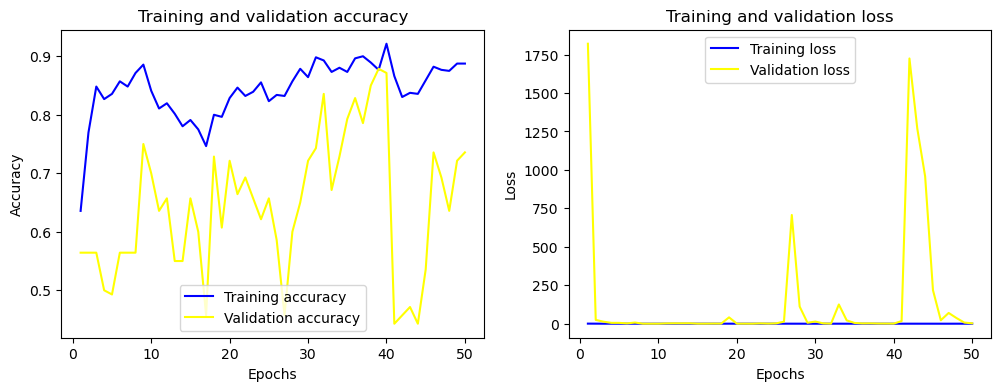

In [188]:
# Plot training & validation accuracy/loss
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc,color='blue', label='Training accuracy')
    plt.plot(epochs, val_acc,color='yellow', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss,color='blue', label='Training loss')
    plt.plot(epochs, val_loss,color='yellow', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_accuracy_loss(history)

In [190]:
# Get predictions
Y_pred = model.predict(X_val)
y_pred = np.argmax(Y_pred, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 562ms/step


Classification Report
              precision    recall  f1-score   support

        real       0.82      0.68      0.74        79
     altered       0.66      0.80      0.73        61

    accuracy                           0.74       140
   macro avg       0.74      0.74      0.74       140
weighted avg       0.75      0.74      0.74       140

Confusion Matrix
[[54 25]
 [12 49]]


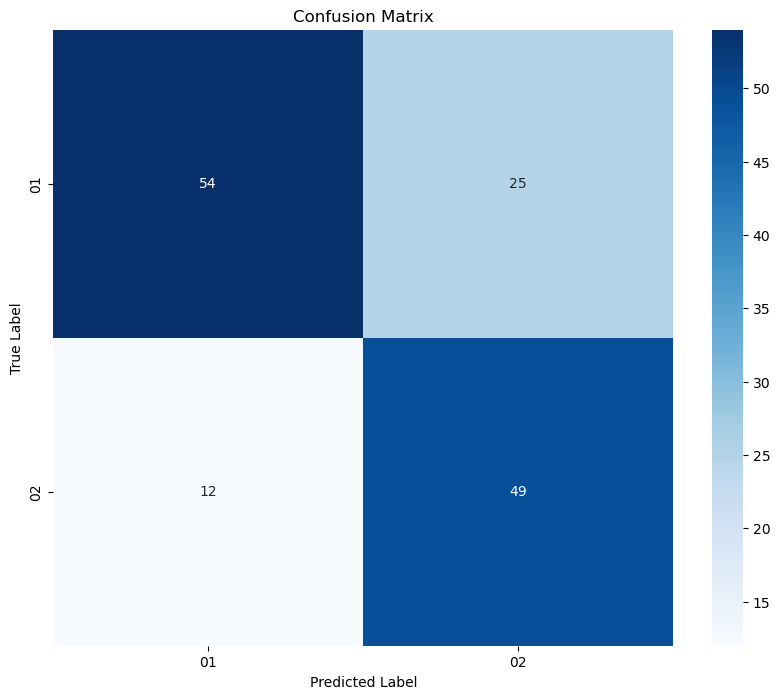

In [191]:
# Confusion matrix and classification report
clr = classification_report(y_val, y_pred, target_names=fingertype)
print("Classification Report")
print(clr)

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)
labels = list(fingertype.values())
print("Confusion Matrix")
print(cm) 
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

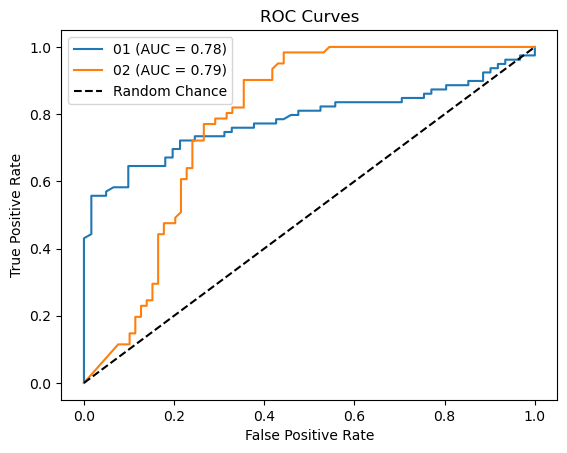

In [194]:
# Binarize labels for ROC-AUC
n_classes = len(labels)
y_val_bin = tf.keras.utils.to_categorical(y_val, num_classes=n_classes)
y_pred_bin = tf.keras.utils.to_categorical(y_pred, num_classes=n_classes)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()